<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/Copy_of_SIAM2021_NN_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Linear Models as Neural Networks
(20/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***


## <font color="green"> Learning outcomes:

* Creating a linear regression model using Tensorflow and Dense layers - concise approach

* Learning about the Sequential Model

* How to view summary trainable weights

## <font color="green">Data information:

* Features: one variable real-valued

* Output: one variable real-valued

## <font color="green">Tasks for participants (boolean)?

* * Yes, at the end (try avoid copy/pasting code, rather write it out)

## Various Python imports

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Let's create some data

In [2]:
X=np.arange(-10, 15, 0.1).reshape(-1, 1)
Y=X+4

View the first value X and Y values

In [3]:
X[0:5]

array([[-10. ],
       [ -9.9],
       [ -9.8],
       [ -9.7],
       [ -9.6]])

In [4]:
Y[0:5]

array([[-6. ],
       [-5.9],
       [-5.8],
       [-5.7],
       [-5.6]])

Let's plot our data

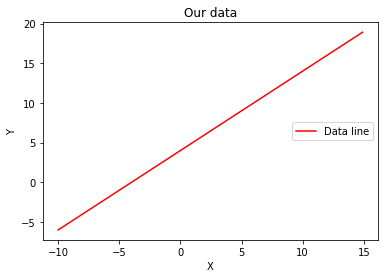

In [5]:
plt.plot(X,Y,color='r',label='Data line')
plt.legend(loc='right')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Our data')
plt.show()

### Task: What simple linear model do you think could be used to solve this problem? Express the model as y = .... ?

Simple linear regression. y=f(x)

## Step 1: Define a sequential model

API documentation for Sequential https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Definition: Sequential groups a linear stack of layers.

Below we assign it to the variable 'model' but you can use any variable name, just like with normal Python.

In [6]:
model = tf.keras.Sequential()

In [7]:
model

## Step 2: Add the first layer

Below we create the first hidden layer which has 1 unit.

To add layer to our model we use the .add() function. Our network was stored in the variable 'model' so hence we use 'model.add()'.

In the example below we are adding a fully connected layer which in Tensorflow is called a 'Dense' layer. The dense layer has a number of arguements, just like a normal Python function might have. Take a moment to look at the API to see which arguements it can take.

API documentation for Dense https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

The Dense layer takes on a number of arguements such as 'kernel_initializer', 'bias_initializer', ... . But to start off with we won't specify values ourselves for all of those, instead, we will use the default values to make this example easier. The absolute minimum is to specify the number of units.

We also need to specify the input shape *only* on the very first hidden layer in a Tensorflow model. This makes sense as the code needs to know how many inputs there are so that it can create the correct weights.

We also specify an activation function, in this case the linear function

In [8]:
model.add(keras.layers.Dense(units=1, input_shape=[1], activation='linear'))

## Task: what do you think the model looks like if you had to draw it on paper?

## Step 3: Compile the model

Before training a model, we need to compile it. This allows us to provide the loss function and the optimiser.

In [9]:
model.compile(loss = "mean_squared_error", optimizer="sgd", metrics=['mse'])

## Take a look at the model before training

The output contains three columns. Take a moment to look at them.

* Does the output shape make sense for our data?

* Why are there only two parameters (column named: Param #)?

* What does trainable/non-trainable mean?

* Why is there "None" in the output shape?

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## View the weights of the model

Now that we have defined and compiled our model let's take a moment to see what the randomly initialised weights are. The array below contains 2 values. Does this make sense? What could each one represent?

In [11]:
model.get_weights()

[array([[0.1291436]], dtype=float32), array([0.], dtype=float32)]

## Given the values above, what does the model now represent if you had to write it out

## y = ... ?

y=0.1291436 *x + 0.0

## Let's see what the model will predict on some arbitrary value (e.g. 34). Note that we haven't trained the model yet so it would be reasonable to expect an incorrect output.

## What should the correct output actually be for our example input of 34?

In [12]:
model.predict([34.0])

array([[4.3908825]], dtype=float32)

## Step 4: Train the network

To train the model we use the .fit() function.

API for the .fit() https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit is actually in the Model object. This makes sense as we had essentially created a Model object for which one of it's properties is 'fit'. This function takes on many parameters, let's ignore a lot of them for now. The minimum is to provide the features (X), targets (Y) and number of epochs.

Let's keep it simple and train for 15 epochs.

Take a look at the output. Information about each epoch is provided.

Note that we store the result of this function call into a variable called 'history'. This will allow us to extract information about the loss and the 'metric' over each epoch - essentially allowing us to make plots.



In [13]:
history = model.fit(X, Y, epochs=15)

Epoch 1/15
8/8 [==============================] - 0s 2ms/step - loss: 21.6484 - mse: 21.6484
Epoch 2/15
8/8 [==============================] - 0s 1ms/step - loss: 9.7713 - mse: 9.7713
Epoch 3/15
8/8 [==============================] - 0s 1ms/step - loss: 7.5259 - mse: 7.5259
Epoch 4/15
8/8 [==============================] - 0s 2ms/step - loss: 5.4555 - mse: 5.4555
Epoch 5/15
8/8 [==============================] - 0s 1ms/step - loss: 3.9993 - mse: 3.9993
Epoch 6/15
8/8 [==============================] - 0s 2ms/step - loss: 2.9904 - mse: 2.9904
Epoch 7/15
8/8 [==============================] - 0s 2ms/step - loss: 2.2921 - mse: 2.2921
Epoch 8/15
8/8 [==============================] - 0s 2ms/step - loss: 1.6704 - mse: 1.6704
Epoch 9/15
8/8 [==============================] - 0s 3ms/step - loss: 1.2358 - mse: 1.2358
Epoch 10/15
8/8 [==============================] - 0s 2ms/step - loss: 0.9444 - mse: 0.9444
Epoch 11/15
8/8 [==============================] - 0s 2ms/step - loss: 0.7298 - mse: 0.

## Plot the training history

To plot the history of the training, we make use of the 'history' variable defined above. Note that you can name it anything you want, just like with any Python variable. First let's see what is inside the history variable. It contains a property called '.history'. Let's view it

In [14]:
history.history

{'loss': [21.648427963256836,
  9.77131462097168,
  7.525886535644531,
  5.455487251281738,
  3.9992988109588623,
  2.990408182144165,
  2.2921197414398193,
  1.6703546047210693,
  1.2357851266860962,
  0.9443555474281311,
  0.7297877073287964,
  0.5293111801147461,
  0.403351366519928,
  0.3324146866798401,
  0.21983416378498077],
 'mse': [21.648427963256836,
  9.77131462097168,
  7.525886535644531,
  5.455487251281738,
  3.9992988109588623,
  2.990408182144165,
  2.2921197414398193,
  1.6703546047210693,
  1.2357851266860962,
  0.9443555474281311,
  0.7297877073287964,
  0.5293111801147461,
  0.403351366519928,
  0.3324146866798401,
  0.21983416378498077]}

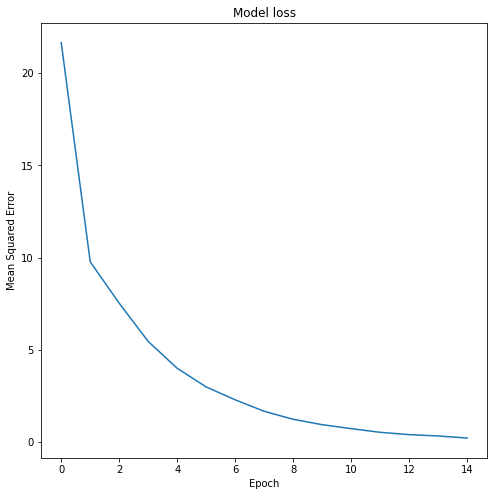

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mse'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

## Predict on some value

We can use the .prediction() function to make predictions. API https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

In [16]:
model.predict([34.0])

array([[38.32168]], dtype=float32)

## View the weights of the model (after training) Compare these to the weights you got before training.

In [17]:
model.get_weights()

[array([[1.02266]], dtype=float32), array([3.5512397], dtype=float32)]

## Extract the first weight

In [22]:
model.layers[0].get_weights()[0]

array([[1.02266]], dtype=float32)

In [18]:
model.layers[0].get_weights()[0][0][0]

1.02266

## Extract the bias

In [23]:
model.layers[0].get_weights()[1][0]

3.5512397

## Insert the values into the equation w_1 X + b, where X = 34. Does this give the same result as the predict function above? Based on the weight and bias you obtained, do these values seem reasonable for our data?

In [24]:
34*model.layers[0].get_weights()[0][0][0] + model.layers[0].get_weights()[1][0]

38.321680307388306

## Plot the results

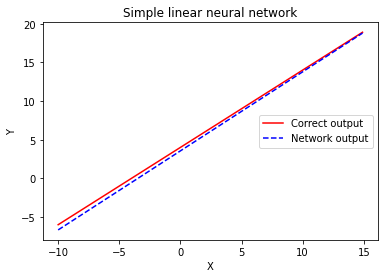

In [25]:
plt.plot(X,Y,color='r',label='Correct output')
plt.plot(X,model.predict(X),color='b', linestyle='dashed',label='Network output')
plt.legend(loc='right')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Simple linear neural network')
plt.show()

## Tasks

* Run the notebook yourself and check that you understand the various aspects

* Try predicting for another value (e.g. 10), is the answer correct?

* Train the model for a different number of epochs (e.g. small number of epochs and then a large number), are the results as good? ***NOTE: if you want to train a model again after changing a hyper-parameter you need to execute the model initialisation again (Steps 1, 2 and 3 above). If not, you will resume training from whatever state the weights and biases were previously! Try this out for yourself without re-initialising.***

* Try using a different activation function, eg: sigmoid, relu or tanh. Which one would make sense for our data? Does Relu make sense for our data? Does sigmoid make sense given our Y values?




In [28]:
#When x=10
10*model.layers[0].get_weights()[0][0][0] + model.layers[0].get_weights()[1][0] 

13.77783989906311

In [50]:
##Train different model

model1 = tf.keras.Sequential()

model1.add(keras.layers.Dense(units=1,input_shape = [1],activation = 'relu' ))
model1.compile(loss='mean_squared_error', optimizer = 'sgd', metrics= ['mse'])

In [51]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
model1.get_weights()

[array([[0.3913449]], dtype=float32), array([0.], dtype=float32)]

In [53]:
model1.predict([34.0])

array([[13.305727]], dtype=float32)

In [55]:
history=model1.fit(X,Y, epochs = 25)

Epoch 1/25
8/8 [==============================] - 0s 2ms/step - loss: 5.0511 - mse: 5.0511
Epoch 2/25
8/8 [==============================] - 0s 2ms/step - loss: 4.9131 - mse: 4.9131
Epoch 3/25
8/8 [==============================] - 0s 2ms/step - loss: 4.8981 - mse: 4.8981
Epoch 4/25
8/8 [==============================] - 0s 2ms/step - loss: 4.7581 - mse: 4.7581
Epoch 5/25
8/8 [==============================] - 0s 1ms/step - loss: 4.6437 - mse: 4.6437
Epoch 6/25
8/8 [==============================] - 0s 1ms/step - loss: 4.5662 - mse: 4.5662
Epoch 7/25
8/8 [==============================] - 0s 2ms/step - loss: 4.4893 - mse: 4.4893
Epoch 8/25
8/8 [==============================] - 0s 2ms/step - loss: 4.4060 - mse: 4.4060
Epoch 9/25
8/8 [==============================] - 0s 2ms/step - loss: 4.3491 - mse: 4.3491
Epoch 10/25
8/8 [==============================] - 0s 2ms/step - loss: 4.2501 - mse: 4.2501
Epoch 11/25
8/8 [==============================] - 0s 2ms/step - loss: 4.1991 - mse: 4.19

In [56]:
history.history

{'loss': [5.051102638244629,
  4.913092136383057,
  4.8980865478515625,
  4.758131980895996,
  4.643668174743652,
  4.566153049468994,
  4.489306926727295,
  4.406000137329102,
  4.349128723144531,
  4.250052452087402,
  4.199143409729004,
  4.111950874328613,
  4.038873195648193,
  3.9726555347442627,
  3.923281669616699,
  3.859525203704834,
  3.7987167835235596,
  3.745163679122925,
  3.6884706020355225,
  3.6364002227783203,
  3.5891668796539307,
  3.557600259780884,
  3.5023300647735596,
  3.461662769317627,
  3.423882246017456],
 'mse': [5.051102638244629,
  4.913092136383057,
  4.8980865478515625,
  4.758131980895996,
  4.643668174743652,
  4.566153049468994,
  4.489306926727295,
  4.406000137329102,
  4.349128723144531,
  4.250052452087402,
  4.199143409729004,
  4.111950874328613,
  4.038873195648193,
  3.9726555347442627,
  3.923281669616699,
  3.859525203704834,
  3.7987167835235596,
  3.745163679122925,
  3.6884706020355225,
  3.6364002227783203,
  3.5891668796539307,
  3.5

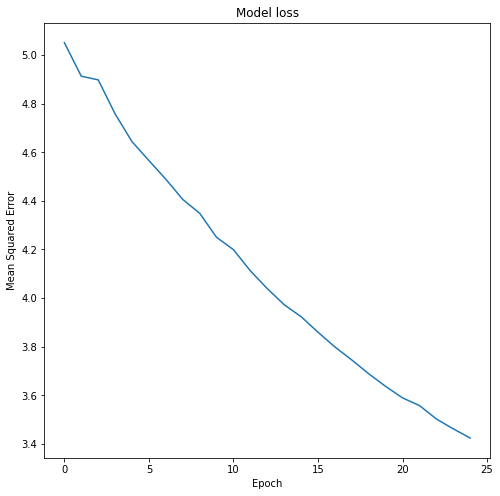

In [57]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mse'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

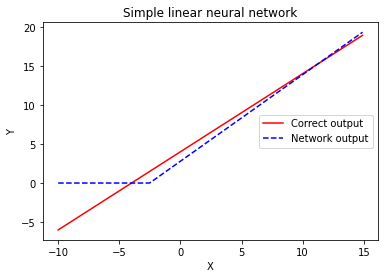

In [58]:
plt.plot(X,Y,color='r',label='Correct output')
plt.plot(X,model1.predict(X),color='b', linestyle='dashed',label='Network output')
plt.legend(loc='right')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Simple linear neural network')
plt.show()

In [59]:
34*model1.layers[0].get_weights()[0][0][0] + model1.layers[0].get_weights()[1][0]

40.46163201332092